# Setup the directories

In [1]:
import os
base_dir = '/home/ayan/Documents/Computer Vision/Classification/Cat_Vs_Dog/cats_and_dogs_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Data Preprocessing using ImageDataGenerator
ImageDataGenerator converts image files into batches of preprocessed tensors
Note: A Python generator is an object that acts as an iterator

In [2]:
from keras.preprocessing.image import ImageDataGenerator

#Rescale all pixel values between 0 - 255 to (1, 0)
train_idg = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')
test_idg = ImageDataGenerator(rescale = 1./255) #Validation images are not augmented

train_gen = train_idg.flow_from_directory(
    train_dir,
    target_size = (150, 150),       #resize images to (150, 150)
    batch_size = 32,                #32samples per batch i.e. shape = (32, 150, 150, 3)
    class_mode = 'binary'           #since this is a binary classification problem
)

valid_gen = test_idg.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Build a small ConvNet model
This is the most time consuming section.
I noticed that I am getting a better training accuracy using filter size = 5 and strides = 2 compared to MaxPooling

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

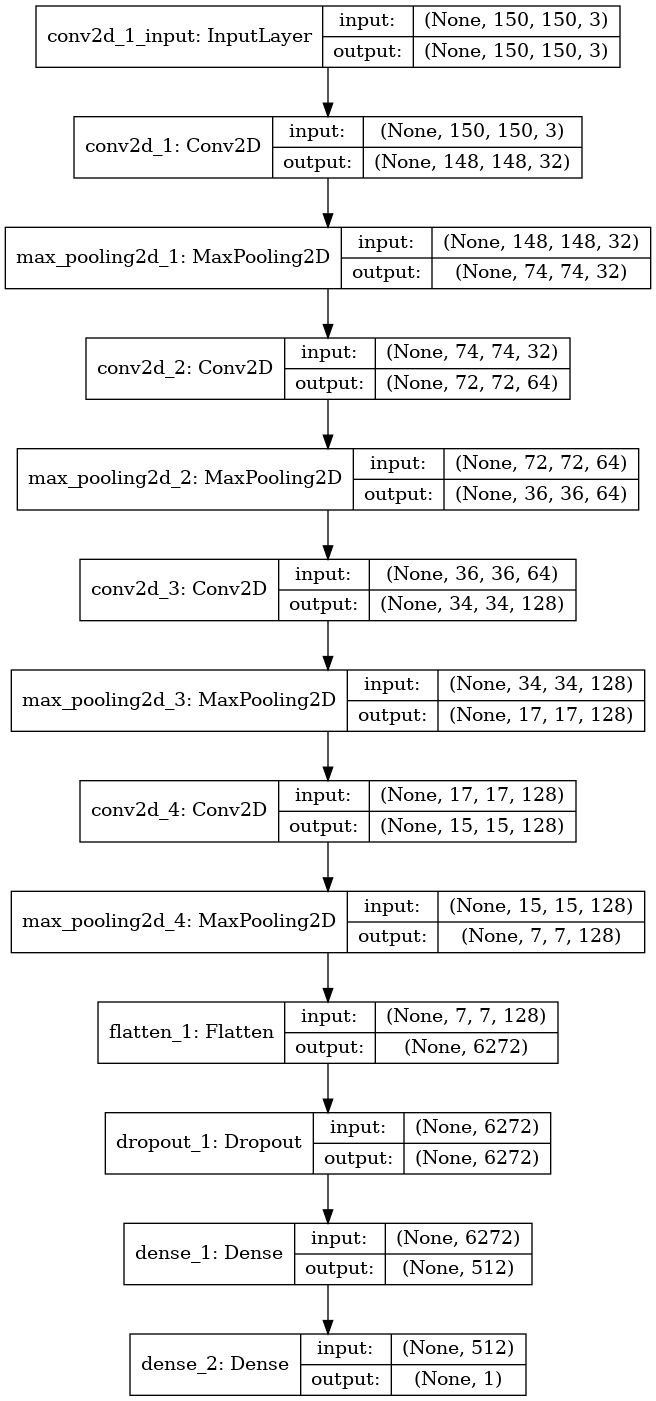

In [3]:
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu',
                input_shape = (150, 150, 3))) #channel last; num of params = (32 * ((3 * 3 * 3) + 1)) = 896
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 64, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 128, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'data-aug_convnet.png')

# Setup & configure optimizers

In [4]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

# Use batch generator
'steps_per_epoch' is for telling the fit_generator that it needs to run mentioned number of gradient descent steps before drawing the next epoch batch
'validation_steps' tells the process about number of batches to draw from the validation generator

In [5]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = valid_gen,
    validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6934 - binary_accuracy: 0.5051 - val_loss: 0.6856 - val_binary_accuracy: 0.5939
Epoch 2/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6860 - binary_accuracy: 0.5524 - val_loss: 0.6603 - val_binary_accuracy: 0.5631
Epoch 3/100
100/100 [==============================] - 11s 109ms/step - loss: 0.6674 - binary_accuracy: 0.5979 - val_loss: 0.6876 - val_binary_accuracy: 0.5895
Epoch 4/100
100/100 [==============================] - 11s 112ms/step - loss: 0.6583 - binary_accuracy: 0.6095 - val_loss: 0.6384 - val_binary_accuracy: 0.6392
Epoch 5/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6384 - binary_accuracy: 0.6391 - val_loss: 0.6750 - val_binary_accuracy: 0.5736
Epoch 6/100
100/100 [==============================] - 12s 117ms/step - loss: 0.6286 - binary_accuracy: 0.6495 - val_loss: 0.6689 - val_binary_accuracy: 0.6927
Epoch 7/100
100/100 [===================

Epoch 52/100
100/100 [==============================] - 12s 119ms/step - loss: 0.4171 - binary_accuracy: 0.8090 - val_loss: 0.6136 - val_binary_accuracy: 0.7925
Epoch 53/100
100/100 [==============================] - 11s 109ms/step - loss: 0.4181 - binary_accuracy: 0.8125 - val_loss: 0.3019 - val_binary_accuracy: 0.7925
Epoch 54/100
100/100 [==============================] - 11s 112ms/step - loss: 0.4376 - binary_accuracy: 0.7899 - val_loss: 0.4833 - val_binary_accuracy: 0.8099
Epoch 55/100
100/100 [==============================] - 11s 108ms/step - loss: 0.4107 - binary_accuracy: 0.8131 - val_loss: 0.7000 - val_binary_accuracy: 0.7735
Epoch 56/100
100/100 [==============================] - 11s 112ms/step - loss: 0.4251 - binary_accuracy: 0.8015 - val_loss: 0.3429 - val_binary_accuracy: 0.7977
Epoch 57/100
100/100 [==============================] - 11s 112ms/step - loss: 0.4164 - binary_accuracy: 0.8090 - val_loss: 0.4478 - val_binary_accuracy: 0.8009
Epoch 58/100
100/100 [============

# Display training vs validation 

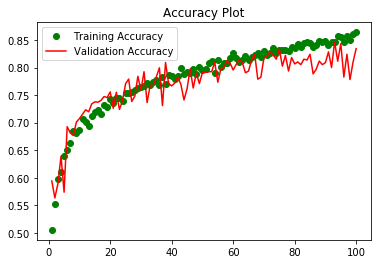

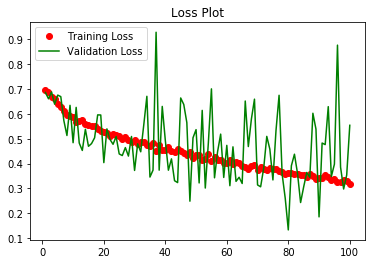

In [6]:
import matplotlib.pyplot as plt
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'go', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()